# Correlação da Carteira

In [2]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### Carteira de ações

In [9]:
# tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA','PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']
tickers = ['NOBL', 'IAU', 'VGT']
# tickers = ['AMZN', 'M', 'LB']

### Calculando a variação diária de cada ação da carteira

In [10]:
prices = pd.DataFrame()

for b in tickers:
    prices[b] = web.DataReader(b, ds_yahoo, start, end)['Adj Close']

log_returns = np.log(prices / prices.shift(1))
correlacao = log_returns.corr()

### Mapa de calor

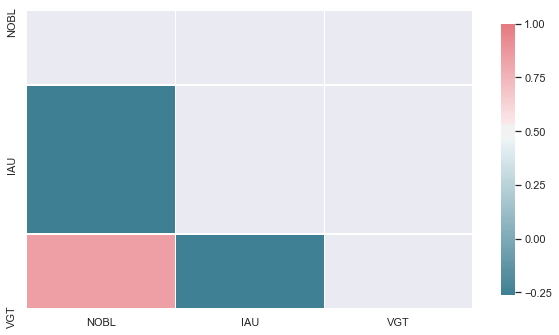

In [11]:
sns.set()

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Tabela de correlação

In [12]:
correlacao

,NOBL,IAU,VGT
NOBL,1.000000,-0.263982,0.839004
IAU,-0.263982,1.000000,-0.249325
VGT,0.839004,-0.249325,1.000000
